# SPamCo with Ensembles

In [1]:
#Math packages
import numpy as np

#Data packages
import pandas as pd
import pandas_profiling

#Spamco
from spamco import SPamCo, Validation

#Data packages
from sklearn.datasets import make_moons, make_classification, make_circles, make_blobs, make_gaussian_quantiles
from sklearn.datasets import load_breast_cancer, load_digits, load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder

#Classifier packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

#Validation packages
from sklearn.metrics import accuracy_score

#Visualization packages
import plotly.express as px

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from matplotlib.ticker import MaxNLocator
%matplotlib inline

import baycomp

#General utility packages
from itertools import cycle, islice
import warnings

warnings.filterwarnings("ignore")
matplotlib.rcParams.update({'font.size': 20})

In [5]:
def load_diabetes():
    df = pd.read_csv('Data/diabetes.csv')
    y =df.values[:,0]
    X =df.drop(['Diabetes_012','AnyHealthcare'], axis = 1).values
    return X, y

In [6]:
def load_blood():
    X, y = fetch_openml(data_id = 1464, return_X_y=True)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [7]:
def load_qsar():
    X, y = fetch_openml(data_id = 1494, return_X_y=True)
    X = X.drop(['V1'], axis=1)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [8]:
def load_eegeye():
    X, y = fetch_openml(data_id = 1471, return_X_y=True)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [9]:
def load_ilpd():
    X, y = fetch_openml(data_id = 1480, return_X_y=True)
    LE = LabelEncoder()
    X['V2'] = LE.fit_transform(X['V2'])
    X = X.values
    y = LE.fit_transform(y)
    return X, y

In [10]:
def load_click():
    X, y = fetch_openml(data_id = 1220, return_X_y=True)
    X = X.drop(['user_id'], axis=1)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [11]:
def load_satimage():
    X, y = fetch_openml(data_id = 182, return_X_y=True)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [12]:
def load_robot():
    X, y = fetch_openml(data_id = 300, return_X_y=True)
    X = X.drop(['f451'], axis=1)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [13]:
np.random.seed(1)
seed = np.random.randint(low = 1, high = 10000, size = 10)

In [14]:
seed

array([ 236, 5193,  906, 7814, 2896, 5057,  145, 4226, 7752, 3463])

# Toy Datasets

In [15]:
datasets = {
    'breast_cancer': load_breast_cancer(return_X_y=True),
    'digits': load_digits(return_X_y=True),
    'blood': load_blood(),
    'diabetes': load_diabetes(),
    'qsar': load_qsar(),
    'eegeye': load_eegeye(),
    'ilpd': load_ilpd(),
    'click': load_click(),
    'satimage': load_satimage(),
    'robot': load_robot()
}

## AdaBoost

In [13]:
adaboost_base_metrics = []
adaboost_base_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    model =  {
        'classifier':AdaBoostClassifier(),
        'num_view':1,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard'
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        iters=10,
        cv=True
    )

    adaboost_base_metrics.append(metrics)
    adaboost_base_clfs.append(clfs)

    adaboost_base_score = np.array(adaboost_base_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9035087719298246 Labels: 22
Validation Iteration: 0 Accuracy: 0.8771929824561403 Labels: 22
Validation Iteration: 0 Accuracy: 0.8771929824561403 Labels: 22
Validation Iteration: 0 Accuracy: 0.8333333333333334 Labels: 22
Validation Iteration: 0 Accuracy: 0.8849557522123894 Labels: 22
Dataset: digits
Validation Iteration: 0 Accuracy: 0.16944444444444445 Labels: 71
Validation Iteration: 0 Accuracy: 0.35833333333333334 Labels: 71
Validation Iteration: 0 Accuracy: 0.3231197771587744 Labels: 71
Validation Iteration: 0 Accuracy: 0.1977715877437326 Labels: 71
Validation Iteration: 0 Accuracy: 0.1392757660167131 Labels: 71
Dataset: blood
Validation Iteration: 0 Accuracy: 0.74 Labels: 29
Validation Iteration: 0 Accuracy: 0.7266666666666667 Labels: 29
Validation Iteration: 0 Accuracy: 0.7 Labels: 29
Validation Iteration: 0 Accuracy: 0.7651006711409396 Labels: 29
Validation Iteration: 0 Accuracy: 0.6912751677852349 Labels: 29
Dataset: diab

In [14]:
adaboost_base_score

array([[0.88495575, 0.92920354, 0.84955752, 0.88495575, 0.83185841,
        0.92920354, 0.89380531, 0.85840708, 0.9380531 , 0.91150442],
       [0.13927577, 0.24233983, 0.27576602, 0.1643454 , 0.24233983,
        0.24233983, 0.22284123, 0.25626741, 0.20891365, 0.3091922 ],
       [0.69127517, 0.68456376, 0.67785235, 0.71812081, 0.69127517,
        0.77181208, 0.75838926, 0.76510067, 0.6442953 , 0.73154362],
       [0.84462709, 0.84553374, 0.84525781, 0.84452854, 0.84513955,
        0.84776096, 0.84600678, 0.84578997, 0.84655866, 0.84746531],
       [0.74881517, 0.82464455, 0.77251185, 0.71090047, 0.76777251,
        0.72511848, 0.7535545 , 0.79620853, 0.73459716, 0.81042654],
       [0.71461949, 0.71495327, 0.67790387, 0.70927904, 0.71094793,
        0.68858478, 0.68090788, 0.70126836, 0.70093458, 0.7099466 ],
       [0.62931034, 0.65517241, 0.69827586, 0.63793103, 0.63793103,
        0.68965517, 0.74137931, 0.59482759, 0.55172414, 0.69827586],
       [0.81812492, 0.82087871, 0.8298911

In [23]:
pd.DataFrame(adaboost_base_score).to_csv("cv_adaboost_base_score.csv", header=None, index=None)

In [15]:
adaboost_multi_metrics = []
adaboost_multi_clfs = []

for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    steps = 20
    views = 2

    model =  {
        'classifier':AdaBoostClassifier(),
        'num_view':views,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard',
        'update_add_num': int(X.shape[0]/steps)
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        spaco=True,
        iters=10,
        hsplit=True,
        hsplit_size=2,
        cv=True,
        verbosity=11
    )
    
    adaboost_multi_metrics.append(metrics)
    adaboost_multi_clfs.append(clfs)
    
adaboost_multi_score = np.array(adaboost_multi_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.37719298245614036 Labels: 22
Validation Iteration: 0 Accuracy: 0.6929824561403509 Labels: 22
Validation Iteration: 0 Accuracy: 0.3684210526315789 Labels: 22
Validation Iteration: 0 Accuracy: 0.631578947368421 Labels: 22
Validation Iteration: 0 Accuracy: 0.4247787610619469 Labels: 22
Dataset: digits
Validation Iteration: 0 Accuracy: 0.13055555555555556 Labels: 71
Validation Iteration: 0 Accuracy: 0.12777777777777777 Labels: 71
Validation Iteration: 0 Accuracy: 0.14484679665738162 Labels: 71
Validation Iteration: 0 Accuracy: 0.052924791086350974 Labels: 71
Validation Iteration: 0 Accuracy: 0.10863509749303621 Labels: 71
Dataset: blood
Validation Iteration: 0 Accuracy: 0.76 Labels: 29
Validation Iteration: 0 Accuracy: 0.76 Labels: 29
Validation Iteration: 0 Accuracy: 0.76 Labels: 29
Validation Iteration: 0 Accuracy: 0.8053691275167785 Labels: 29
Validation Iteration: 0 Accuracy: 0.7651006711409396 Labels: 29
Dataset: diabetes
Vali

In [22]:
adaboost_multi_score

array([[0.42477876, 0.37168142, 0.89380531, 0.38938053, 0.71681416,
        0.71681416, 0.88495575, 0.62831858, 0.9380531 , 0.87610619],
       [0.1086351 , 0.16155989, 0.24233983, 0.18662953, 0.17270195,
        0.13091922, 0.15041783, 0.23398329, 0.16991643, 0.19498607],
       [0.76510067, 0.7114094 , 0.59060403, 0.75167785, 0.72483221,
        0.76510067, 0.76510067, 0.77852349, 0.76510067, 0.76510067],
       [0.84239987, 0.84239987, 0.84239987, 0.84239987, 0.84239987,
        0.84239987, 0.84239987, 0.84239987, 0.84239987, 0.84239987],
       [0.60663507, 0.58767773, 0.7535545 , 0.62085308, 0.66350711,
        0.72037915, 0.77251185, 0.7535545 , 0.68720379, 0.66350711],
       [0.58044059, 0.55974633, 0.53671562, 0.5540721 , 0.55440587,
        0.53838451, 0.54506008, 0.55106809, 0.55206943, 0.46328438],
       [0.63793103, 0.6637931 , 0.54310345, 0.61206897, 0.71551724,
        0.71551724, 0.70689655, 0.69827586, 0.34482759, 0.71551724],
       [0.83139317, 0.83164351, 0.8316435

In [24]:
pd.DataFrame(adaboost_multi_score).to_csv("cv_adaboost_multi_score.csv", header=None, index=None)

In [2]:
adaboost_base_score = pd.read_csv("cv_adaboost_base_score.csv", header = None).to_numpy()
adaboost_multi_score = pd.read_csv("cv_adaboost_multi_score.csv", header = None).to_numpy()

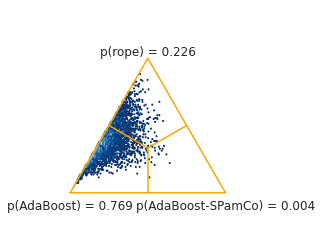

In [3]:
baycomp_ada, bayplot_ada = baycomp.two_on_multiple(
    adaboost_base_score, 
    adaboost_multi_score, 
    plot=True, 
    rope=0.05, 
    names = ('AdaBoost','AdaBoost-SPamCo'))

In [4]:
bayplot_ada.savefig('CV AdaBoost_Simplex_BayesianComp.png')

## RandomForrestClassifier

In [16]:
rfc_base_metrics = []
rfc_base_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    model =  {
        'classifier':RandomForestClassifier(),
        'num_view':1,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard'
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        iters=10,
        cv=True
    )

    rfc_base_metrics.append(metrics)
    rfc_base_clfs.append(clfs)

rfc_base_score = np.array(rfc_base_metrics)
pd.DataFrame(rfc_base_score).to_csv("cv_rfc_base_score.csv", header=None, index=None)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9122807017543859 Labels: 22
Validation Iteration: 0 Accuracy: 0.9473684210526315 Labels: 22
Validation Iteration: 0 Accuracy: 0.9035087719298246 Labels: 22
Validation Iteration: 0 Accuracy: 0.9385964912280702 Labels: 22
Validation Iteration: 0 Accuracy: 0.9026548672566371 Labels: 22
Dataset: digits
Validation Iteration: 0 Accuracy: 0.8555555555555555 Labels: 71
Validation Iteration: 0 Accuracy: 0.8388888888888889 Labels: 71
Validation Iteration: 0 Accuracy: 0.8467966573816156 Labels: 71
Validation Iteration: 0 Accuracy: 0.883008356545961 Labels: 71
Validation Iteration: 0 Accuracy: 0.7966573816155988 Labels: 71
Dataset: blood
Validation Iteration: 0 Accuracy: 0.7666666666666667 Labels: 29
Validation Iteration: 0 Accuracy: 0.7733333333333333 Labels: 29
Validation Iteration: 0 Accuracy: 0.7466666666666667 Labels: 29
Validation Iteration: 0 Accuracy: 0.7449664429530202 Labels: 29
Validation Iteration: 0 Accuracy: 0.671140939597315

In [17]:
rfc_multi_metrics = []
rfc_multi_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')
    
    steps = 20
    views = 2
    
    model =  {
        'classifier':RandomForestClassifier(),
        'num_view':views,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard',
        'update_add_num': int(X.shape[0]/steps)
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        spaco=True,
        iters=10,
        hsplit=True,
        hsplit_size=2,
        cv=True
    )
    
    rfc_multi_metrics.append(metrics)
    rfc_multi_clfs.append(clfs)
    
rfc_multi_score = np.array(rfc_multi_metrics)
pd.DataFrame(rfc_multi_score).to_csv("cv_rfc_multi_score.csv", header=None, index=None)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.8859649122807017 Labels: 22
Validation Iteration: 0 Accuracy: 0.9385964912280702 Labels: 22
Validation Iteration: 0 Accuracy: 0.9385964912280702 Labels: 22
Validation Iteration: 0 Accuracy: 0.9035087719298246 Labels: 22
Validation Iteration: 0 Accuracy: 0.9557522123893806 Labels: 22
Dataset: digits
Validation Iteration: 0 Accuracy: 0.8138888888888889 Labels: 71
Validation Iteration: 0 Accuracy: 0.7361111111111112 Labels: 71
Validation Iteration: 0 Accuracy: 0.7437325905292479 Labels: 71
Validation Iteration: 0 Accuracy: 0.7799442896935933 Labels: 71
Validation Iteration: 0 Accuracy: 0.754874651810585 Labels: 71
Dataset: blood
Validation Iteration: 0 Accuracy: 0.76 Labels: 29
Validation Iteration: 0 Accuracy: 0.76 Labels: 29
Validation Iteration: 0 Accuracy: 0.7533333333333333 Labels: 29
Validation Iteration: 0 Accuracy: 0.7651006711409396 Labels: 29
Validation Iteration: 0 Accuracy: 0.7651006711409396 Labels: 29
Dataset: diabet

In [5]:
rfc_base_score = pd.read_csv("cv_rfc_base_score.csv", header = None).to_numpy()
rfc_multi_score = pd.read_csv("cv_rfc_multi_score.csv", header = None).to_numpy()

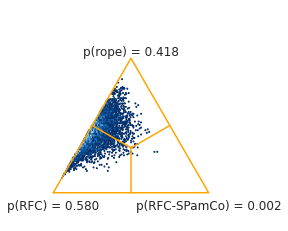

In [6]:
baycomp_rfc, bayplot_rfc = baycomp.two_on_multiple(
    rfc_base_score, 
    rfc_multi_score, 
    plot=True, 
    rope=0.05, 
    names = ('RFC','RFC-SPamCo'))

In [7]:
bayplot_rfc.savefig('CV RandomForestClassifier_Simplex_BayesianComp.png')

## XGBoost

In [18]:
xgboost_base_metrics = []
xgboost_base_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    model =  {
        'classifier':xgb.XGBClassifier(silent=True, verbosity=0),
        'num_view':1,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard'
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.1,
        random_seed=np.arange(0,10),
        iters=10,
        cv=True
    )

    xgboost_base_metrics.append(metrics)
    xgboost_base_clfs.append(clfs)

xgboost_base_score = np.array(xgboost_base_metrics)
pd.DataFrame(xgboost_base_score).to_csv("cv_xgboost_base_score.csv", header=None, index=None)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9298245614035088 Labels: 45
Validation Iteration: 0 Accuracy: 0.9736842105263158 Labels: 45
Validation Iteration: 0 Accuracy: 0.9210526315789473 Labels: 45
Validation Iteration: 0 Accuracy: 0.9122807017543859 Labels: 45
Validation Iteration: 0 Accuracy: 0.9203539823008849 Labels: 45
Dataset: digits
Validation Iteration: 0 Accuracy: 0.825 Labels: 143
Validation Iteration: 0 Accuracy: 0.825 Labels: 143
Validation Iteration: 0 Accuracy: 0.8272980501392758 Labels: 143
Validation Iteration: 0 Accuracy: 0.8245125348189415 Labels: 143
Validation Iteration: 0 Accuracy: 0.8245125348189415 Labels: 143
Dataset: blood
Validation Iteration: 0 Accuracy: 0.6333333333333333 Labels: 59
Validation Iteration: 0 Accuracy: 0.7866666666666666 Labels: 59
Validation Iteration: 0 Accuracy: 0.6733333333333333 Labels: 59
Validation Iteration: 0 Accuracy: 0.5906040268456376 Labels: 59
Validation Iteration: 0 Accuracy: 0.7046979865771812 Labels: 59
Dataset

In [ ]:
xgboost_multi_metrics = []
xgboost_multi_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')
    
    steps = 20
    views = 2
    
    model =  {
        'classifier':xgb.XGBClassifier(silent=True, verbosity=0),
        'num_view':views,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard',
        'update_add_num': int(X.shape[0]/steps)
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        spaco=True,
        iters=10,
        hsplit=True,
        hsplit_size=2,
        cv=True
    )
    
    xgboost_multi_metrics.append(metrics)
    xgboost_multi_clfs.append(clfs)
    
xgboost_multi_score = np.array(xgboost_multi_metrics)
pd.DataFrame(xgboost_multi_score).to_csv("cv_xgboost_multi_score.csv", header=None, index=None)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.8859649122807017 Labels: 22
Validation Iteration: 0 Accuracy: 0.8947368421052632 Labels: 22
Validation Iteration: 0 Accuracy: 0.631578947368421 Labels: 22
Validation Iteration: 0 Accuracy: 0.9385964912280702 Labels: 22
Validation Iteration: 0 Accuracy: 0.8141592920353983 Labels: 22
Dataset: digits
Validation Iteration: 0 Accuracy: 0.7388888888888889 Labels: 71
Validation Iteration: 0 Accuracy: 0.7111111111111111 Labels: 71
Validation Iteration: 0 Accuracy: 0.6518105849582173 Labels: 71
Validation Iteration: 0 Accuracy: 0.6880222841225627 Labels: 71
Validation Iteration: 0 Accuracy: 0.6685236768802229 Labels: 71
Dataset: blood
Validation Iteration: 0 Accuracy: 0.7466666666666667 Labels: 29
Validation Iteration: 0 Accuracy: 0.7666666666666667 Labels: 29
Validation Iteration: 0 Accuracy: 0.7533333333333333 Labels: 29
Validation Iteration: 0 Accuracy: 0.7785234899328859 Labels: 29
Validation Iteration: 0 Accuracy: 0.751677852348993

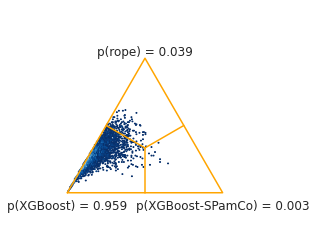

In [28]:
baycomp_xgboost, bayplot_xgboost = baycomp.two_on_multiple(
    xgboost_base_score, 
    xgboost_multi_score, 
    plot=True, 
    rope=.05, 
    names = ('XGBoost','XGBoost-SPamCo'))

In [30]:
bayplot_xgboost.savefig('CV XGBoost_Simplex_BaysianComp.png')

In [54]:
df = pd.DataFrame()

In [58]:
df['Dataset'] = [
    'Wisconsin Breast Cancer',
    'Digits',
    'Blood Transfusion Service Center',
    'Diabetes Health Indicators',
    'QSAR biodegradation',
    'EEG Eye State',
    'ILPD',
    'KDD Cup .1%',
    'Statlog-Landsat Satelite',
    'Robot'
]
df['AdaBoost Mean'] =  np.mean(adaboost_base_score, axis=1)
df['AdaBoost Std'] =  np.std(adaboost_base_score, axis=1)
df['AdaBoost+SPamCo Mean'] = np.mean(adaboost_multi_score, axis=1)
df['AdaBoost+SPamCo Std'] = np.std(adaboost_multi_score, axis=1)
df['RandomForest Mean'] = np.mean(rfc_base_score, axis=1)
df['RandomForest Std'] = np.std(rfc_base_score, axis=1)
df['RandomForest+SPamCo Mean'] = np.mean(rfc_multi_score, axis=1)
df['RandomForest+SPamCo Std'] = np.std(rfc_multi_score, axis=1)
df['XGBoost Mean'] = np.mean(xgboost_base_score, axis=1)
df['XGBoost Std'] = np.std(xgboost_base_score, axis=1)
df['XGBoost+SPamCo Mean'] = np.mean(xgboost_multi_score, axis=1)
df['XGBoost+SPamCo Std'] = np.std(xgboost_multi_score, axis=1)

In [59]:
df

,Dataset,AdaBoost Mean,AdaBoost Std,AdaBoost+SPamCo Mean,AdaBoost+SPamCo Std,RandomForest Mean,RandomForest Std,RandomForest+SPamCo Mean,RandomForest+SPamCo Std,XGBoost Mean,XGBoost Std,XGBoost+SPamCo Mean,XGBoost+SPamCo Std
0,Wisconsin Breast Cancer,0.889474,0.020501,0.689474,2.575152e-01,0.918713,0.029525,0.919883,0.018686,0.911111,0.030252,0.852632,0.049470
1,Digits,0.217593,0.040004,0.147963,3.147549e-02,0.827778,0.022861,0.765741,0.020526,0.820370,0.027864,0.682222,0.041814
2,Blood Transfusion Service Center,0.704444,0.033628,0.735556,6.622819e-02,0.746667,0.013626,0.739556,0.051838,0.734667,0.021868,0.718667,0.060026
3,Diabetes Health Indicators,0.845869,0.001458,0.842413,1.110223e-16,0.843734,0.000575,0.828950,0.002510,0.841468,0.001079,0.842368,0.000147
4,QSAR biodegradation,0.737224,0.039754,0.655836,7.170604e-02,0.756782,0.018201,0.717035,0.018772,0.790536,0.023446,0.706940,0.028302
5,EEG Eye State,0.704784,0.010190,0.549132,3.648873e-02,0.774410,0.009234,0.623209,0.012833,0.828327,0.008175,0.614909,0.037457
6,ILPD,0.658286,0.053714,0.613143,1.256376e-01,0.701143,0.028000,0.689714,0.039511,0.677143,0.023456,0.648571,0.049701
7,KDD Cup .1%,0.827284,0.003446,0.766291,1.943828e-01,0.823171,0.002510,0.753233,0.063731,0.812499,0.002052,0.719675,0.089969
8,Statlog-Landsat Satelite,0.481026,0.078120,0.386833,5.924323e-02,0.851840,0.005846,0.777916,0.009978,0.860912,0.009654,0.767237,0.017212
9,ISOLET,0.093761,0.026437,0.053803,1.902881e-02,0.844658,0.006053,0.785000,0.023747,0.820897,0.009289,0.722521,0.026845


In [60]:
df.to_csv('CV Classification Results on multiple datasets.csv')